In [18]:
import datetime
from datetime import date
from datetime import datetime
import requests
import pprint
from bs4 import BeautifulSoup
import pandas as pd
import re
import pickle
from urllib.request import urlopen
import glob
import altair as alt
import time
import itertools
import numpy as np
import operator
from datetime import timedelta
from ipywidgets import interact, IntSlider
from IPython.display import display
import sklearn
import numpy as np
from sklearn.linear_model import LogisticRegression
# import seaborn as sns
from matplotlib import pyplot as plt
# %matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.pipeline import make_pipeline as make_pipeline_with_sampler
from imblearn.under_sampling import RandomUnderSampler

from pycaret.classification import * 

# pd.options.display.max_columns = 5000
# pd.options.display.max_rows = 5000

injured_pred = 'injured_in_12_week'

simple_features = ['Height', 'Weight', 'age','cum_injury_total', 'weeks_since_last_injury', 'Min_cum','Serie A_cum',
 'Premier League_cum', 'La Liga_cum', 'Ligue 1_cum', 'Bundesliga_cum', 'Champions Lg_cum', 'Europa Lg_cum', 'FIFA World Cup_cum', 'UEFA Nations League_cum', 'UEFA Euro_cum',
 'Copa América_cum', 'Away_cum', 'Home_cum', 'Neutral_cum']

extended_features = ['Height', 'Weight', 'defender', 'attacker', 'midfielder', 'goalkeeper', 'right_foot', 'age', 'cum_injury_total', 'weeks_since_last_injury', 'Min_cum', 'Gls_cum', 'Ast_cum', 'PK_cum', 'PKatt_cum',
 'Sh_cum', 'SoT_cum', 'CrdY_cum', 'CrdR_cum', 'Touches_cum', 'Press_cum', 'Tkl_cum', 'Int_cum', 'Blocks_cum', 'xG_cum', 'npxG_cum', 'xA_cum', 'SCA_cum', 'GCA_cum', 'Cmp_cum',
 'Att_cum', 'Prog_cum', 'Carries_cum', 'Prog.1_cum', 'Succ_cum', 'Att.1_cum', 'Fls_cum', 'Fld_cum', 'Off_cum', 'Crs_cum', 'TklW_cum', 'OG_cum', 'PKwon_cum','PKcon_cum', 'Serie A_cum',
 'Premier League_cum', 'La Liga_cum', 'Ligue 1_cum', 'Bundesliga_cum', 'Champions Lg_cum', 'Europa Lg_cum', 'FIFA World Cup_cum', 'UEFA Nations League_cum', 'UEFA Euro_cum',
 'Copa América_cum', 'Away_cum', 'Home_cum', 'Neutral_cum']

In [7]:
# Load Dataset

# Renzo's Path
# dataset = pd.read_csv('/Volumes/GoogleDrive/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/complete_final_df_5.csv')

# Sravan's Path
# dataset = pd.read_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/dataset_for_model_final.csv')

# Sravan's Parquet Path
dataset = pd.read_parquet('dataframes_blog/dataset_for_model_final.parquet') 

In [3]:
# dataset[dataset['FBRefID']=='dea698d9'].to_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/ronaldo.csv', index=False)
dataset = dataset[dataset['drop'] == 0]
dataset = dataset[dataset['goalkeeper'] == 0]

In [15]:
# Get Train Test Split
df_train = dataset[dataset['cum_week'] <= dataset["train_split"]].dropna()
df_test = dataset[dataset['cum_week'] > dataset["train_split"]].dropna()

In [16]:
X_train = df_train[extended_features]
y_train = df_train[injured_pred]

X_test = df_test[extended_features]
y_test = df_test[injured_pred]

In [6]:
exp_clf = setup(dataset[extended_features + [injured_pred]], target=injured_pred, fix_imbalance=True, feature_selection=True, fold=2)

,Description,Value
0,session_id,6192
1,Target,injured_in_12_week
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(1604775, 59)"
5,Missing Values,True
6,Numeric Features,53
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
set_config('X_train', X_train)
set_config('X_test', X_test)
set_config('y_train', y_train)
set_config('y_test', y_test)

In [8]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9394,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,3.5150
rf,Random Forest Classifier,0.9196,0.5866,0.0327,0.0829,0.0468,0.0132,0.0148,22.4300
lightgbm,Light Gradient Boosting Machine,0.9119,0.6367,0.0853,0.1366,0.1050,0.0613,0.0632,17.1100
et,Extra Trees Classifier,0.8923,0.5862,0.0784,0.0838,0.0810,0.0239,0.0239,22.8250
svm,SVM - Linear Kernel,0.8769,0.0000,0.1586,0.1168,0.1293,0.0671,0.0697,100.8800
ridge,Ridge Classifier,0.8455,0.0000,0.2454,0.1202,0.1614,0.0871,0.0939,4.0300
lda,Linear Discriminant Analysis,0.8455,0.6364,0.2454,0.1202,0.1614,0.0871,0.0939,8.6050
gbc,Gradient Boosting Classifier,0.8382,0.6706,0.2841,0.1269,0.1754,0.1000,0.1101,305.6900
dt,Decision Tree Classifier,0.7933,0.5128,0.1941,0.0694,0.1021,0.0142,0.0166,20.4400
ada,Ada Boost Classifier,0.7563,0.6620,0.4285,0.1104,0.1756,0.0877,0.1158,81.8550


In [11]:
# df = pull()
# df.to_csv('results_1_year.csv', index=False)
df = pull().sort_values(by=['F1'], ascending=False)

In [12]:
# Select best model
model = create_model(df.index[0], fold=5)
save_model(model, 'model_1_quarter')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7585,0.6577,0.4205,0.1098,0.1742,0.0864,0.1135
1,0.7410,0.6650,0.4562,0.1089,0.1759,0.0865,0.1182
2,0.7620,0.6536,0.4190,0.1112,0.1758,0.0885,0.1154
3,0.7490,0.6610,0.4352,0.1084,0.1736,0.0848,0.1137
4,0.7487,0.6679,0.4376,0.1087,0.1742,0.0855,0.1146
Mean,0.7518,0.6610,0.4337,0.1094,0.1747,0.0864,0.1151
SD,0.0075,0.0051,0.0135,0.0010,0.0009,0.0013,0.0017


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='injured_in_12_week',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 n...
                  Advanced_Feature_Selection_Classic(ml_usecase='classification',
                                                     n_jobs=-1,
                                                     random_state=6192,
                 

In [13]:
tuned_model = tune_model(model, optimize = 'F1')
save_model(tuned_model, 'model_1_quarter_tuned')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7784,0.6680,0.4004,0.1158,0.1796,0.0945,0.1191
1,0.7721,0.6669,0.4028,0.1129,0.1763,0.0902,0.1151
Mean,0.7752,0.6674,0.4016,0.1143,0.1780,0.0924,0.1171
SD,0.0032,0.0006,0.0012,0.0014,0.0016,0.0021,0.0020


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='injured_in_12_week',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 n...
                  Advanced_Feature_Selection_Classic(ml_usecase='classification',
                                                     n_jobs=-1,
                                                     random_state=6192,
                 

In [4]:
# Loading the saved model
model_1_quarter_tuned = load_model('model_1_quarter_tuned')

Transformation Pipeline and Model Successfully Loaded


In [13]:
model_1_quarter_tuned[23]

AdaBoostClassifier(learning_rate=0.4, n_estimators=280, random_state=6192)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


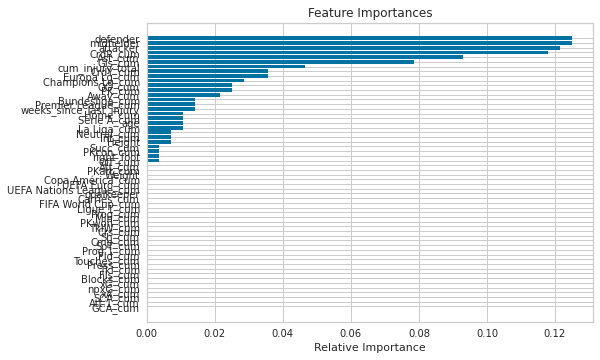

In [19]:
features = X_train.columns
importances = model_1_quarter_tuned[23].feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [6]:
# Getting the accumulated sum of predicted injuries by player

dataset_with_prediction['cum_predicted_injuries'] = dataset_with_prediction.groupby(by=['name'])['unique_predicted_injuries'].cumsum()

NameError: name 'dataset' is not defined

In [175]:
# Picking player to forecast

picked_player_df = dataset_with_prediction[dataset_with_prediction['name'] == 'Neymar']

In [176]:
# Picking the features we are going to use

picked_player_df = picked_player_df[['FBRefID', 'name', 'date', 'Min', 'Position:', 'cum_week', 'defender','attacker', 'midfielder', \
    'goalkeeper', 'cum_injury_in_1_week', 'cum_injury_in_4_week', 'cum_injury_in_12_week', 'cum_injury_in_26_week', 'cum_injury_in_52_week', \
    'Min_cum', 'unique_predicted_injuries']]

In [177]:
# Function to Forecast players injuries and plot a chart

def forecast_it(weeks, df):
    df.reset_index(inplace=True)
    final_index = df.index.max()
    pos = 'cum_injury_in_'+str(weeks)+'_week'
    for n in range(weeks,0,-1): 
        df.loc[final_index-n+1, pos] = ''
    df.loc[df[pos] == "", 'single_injury_prediction_in_'+str(weeks)+'_week'] = df[pos].shift(1) 
    df.loc[df['single_injury_prediction_in_'+str(weeks)+'_week'] == "", 'single_injury_prediction_in_'+str(weeks)+'_week'] = \
        df['unique_predicted_injuries']
    df['cum_injury_prediction_in_'+str(weeks)+'_week'] = df['single_injury_prediction_in_'+str(weeks)+'_week'].cumsum()
    df['cum_injury_prediction_in_'+str(weeks)+'_week'] = df['cum_injury_prediction_in_'+str(weeks)+'_week'].fillna('')
    df.loc[df['cum_injury_in_'+str(weeks)+'_week'] != "", 'cum_injury_prediction_in_'+str(weeks)+'_week'] = df['cum_injury_in_'+str(weeks)+'_week']
    
    df.loc[df['cum_injury_in_'+str(weeks)+'_week'] != "", 'type_for_'+str(weeks)] = 'Actual Injuries'
    df.loc[df['cum_injury_in_'+str(weeks)+'_week'] == "", 'type_for_'+str(weeks)] = 'Predicted Injuries'

    extra_point = df[df['type_for_'+str(weeks)] == 'Actual Injuries'].tail(1)
    extra_point['type_for_'+str(weeks)] = 'Predicted Injuries'
    df = pd.concat([df, extra_point])

    df_final = df[len(df)-85:].sort_index()

    domain_min = df_final['cum_injury_prediction_in_'+str(weeks)+'_week'].min()-5
    domain_max = df_final['cum_injury_prediction_in_'+str(weeks)+'_week'].max()+5

    chart = alt.Chart(df_final).mark_line().encode(x=alt.X('date', timeUnit='yearmonthdate', axis=alt.Axis(tickCount=4)), \
        y=alt.Y('cum_injury_prediction_in_'+str(weeks)+'_week', \
        scale=alt.Scale(domain=[domain_min, domain_max])), color=alt.Color('type_for_'+str(weeks)), strokeDash=alt.condition(
        alt.datum.symbol == 'type_for_'+str(weeks), alt.value([5, 5]), alt.value([0]))). \
        properties(title = str(df['name'].iloc[0])+"'s Injury Prediction for "+str(weeks)+" weeks", width=800, height=300)
    
    return chart


In [178]:
#Forecasting 1 Quarter (12 Weeks)

result_12_weeks = forecast_it(12, picked_player_df)

In [179]:
result_12_weeks

alt.Chart(...)